# House Price Prediction with Regularization

We want to solve Surprise Housing's challenge of predicting house prices in the Australian real estate market. The primary objective is to build a robust regression model using regularization techniques, specifically Ridge and Lasso, to assist the company in making informed investment decisions.

## Objectives:

1) Variable Significance:
Identify the crucial variables that significantly impact house prices.

2) Model Performance:
Evaluate how well the selected variables collectively describe the pricing dynamics.

3) Optimal Regularization:
Determine the ideal values of lambda for Ridge and Lasso regression to enhance model generalization.

By the end of this notebook, we aim to provide actionable insights, aiding Surprise Housing's strategic planning and decision-making processes in the Australian real estate market.

Let's dive into the data exploration, model development, and analysis to uncover valuable patterns in house pricing.

## Overview
- Initial exploration of the dataset and understanding key features.

In [69]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# Setting display options
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Reading the dataset
file_path = "train.csv"

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Displaying the first few rows of the dataset
data.head()

Dataset loaded successfully.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
# Display column details and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
# Check the dimensions of the dataset
print(f"Dataset dimensions: {data.shape}")

Dataset dimensions: (1460, 81)


In [73]:
# To get the description of the dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [74]:
# Check percentage of null values in each column
null_percentage = round(100 * (data.isnull().sum() / len(data.index)), 2)
print("Percentage of null values in each column:")
print(null_percentage)

Percentage of null values in each column:
Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir     

In [75]:
# Check for duplicates based on 'Id' column
no_duplicates = sum(data.duplicated(subset='Id')) == 0
print(f"No duplicates: {no_duplicates}")

No duplicates: True


In [76]:
# Checking for outliers in the numerical columns
numerical_summary = data.describe(percentiles=[.25, .5, .75, .90, .95, .99])
print("Summary statistics for numerical columns:")
print(numerical_summary)

Summary statistics for numerical columns:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd

In [78]:
def remove_outliers(data, column_name):
    # Calculate the first quartile
    first_quartile = data[column_name].quantile(0.25)
    # Calculate the third quartile
    third_quartile = data[column_name].quantile(0.75)
    # Calculate the interquartile range
    interquartile_range = third_quartile - first_quartile
    # Calculate the lower bound for outliers
    lower_bound = first_quartile - 1.5 * interquartile_range
    # Calculate the upper bound for outliers
    upper_bound = third_quartile + 1.5 * interquartile_range
    
    # Filter out the outliers
    data_no_outliers = data[(data[column_name] > lower_bound) & (data[column_name] < upper_bound)]
    
    return data_no_outliers

In [79]:
# Identify columns with null values
columns_with_nulls = data.columns[data.isnull().any()]

# Calculate percentage of nulls for each column
null_percentage = data[columns_with_nulls].isnull().sum() / len(data) * 100

# Filter columns with non-zero null percentage
null_columns = null_percentage[null_percentage > 0]

# Sort columns by null percentage in descending order
null_columns = null_columns.sort_values(ascending=False)

# Display columns with nulls and their respective null percentages
print("Columns with null values:")
print(columns_with_nulls)
print("\nNull percentages:")
print(null_columns)


Columns with null values:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Null percentages:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [80]:
# Set a threshold for null percentage
null_threshold = 50

# Filter columns with null percentages above the threshold
columns_to_remove = null_columns[null_columns > null_threshold].index

# Remove columns with high null values from the DataFrame
data_filtered = data.drop(columns=columns_to_remove)

# Display the resulting DataFrame
print("DataFrame after removing columns with high null values:")
print(data_filtered)

DataFrame after removing columns with high null values:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Conditi

In [81]:
# Repeating the process for data_filtered
columns_with_null_filtered = data_filtered.columns[data_filtered.isnull().any()] 

null_percentages_filtered = data_filtered[columns_with_null_filtered].isnull().sum() / len(data_filtered) * 100
null_percentages_filtered = null_percentages_filtered[null_percentages_filtered > 0]
null_percentages_filtered.sort_values(inplace=True, ascending=False)

# Display columns with null values and their percentages
print("Columns with null values in data_filtered:")
print(columns_with_null_filtered)
print("\nNull percentages in data_filtered:")
print(null_percentages_filtered)


Columns with null values in data_filtered:
Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

Null percentages in data_filtered:
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [82]:
from sklearn.impute import SimpleImputer

# Impute 'LotFrontage' based on 'Neighborhood' median
data_filtered['LotFrontage'] = data_filtered.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Impute other columns using SimpleImputer
imputer = SimpleImputer(strategy='median')
columns_to_impute = ["GarageYrBlt", "MasVnrArea"]
data_filtered[columns_to_impute] = imputer.fit_transform(data_filtered[columns_to_impute])

# Drop rows with missing values in 'Electrical'
data_filtered = data_filtered.dropna(subset=["Electrical"])

In [83]:
# Selecting numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Dropping the 'Id' column
data_numeric = data_numeric.drop(['Id'], axis=1)

# Displaying the head of the resulting DataFrame
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Exploratory Data Analysis (EDA)

## Univariate Analysis
- Visualizing and analyzing individual variables.

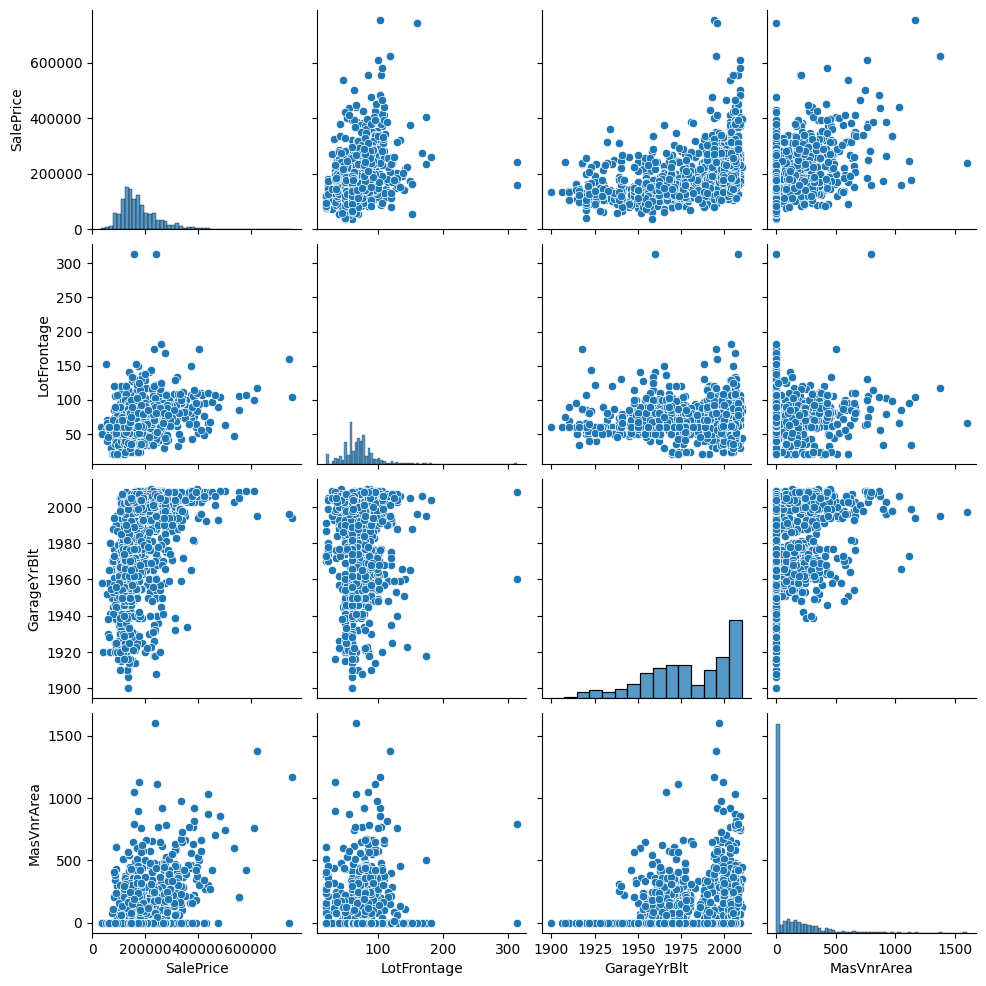

In [84]:
# Select a subset of numeric columns for pairplot
subset_columns = ['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea']

# Pairplot for the selected numeric columns
sns.pairplot(data_numeric[subset_columns])
plt.show()

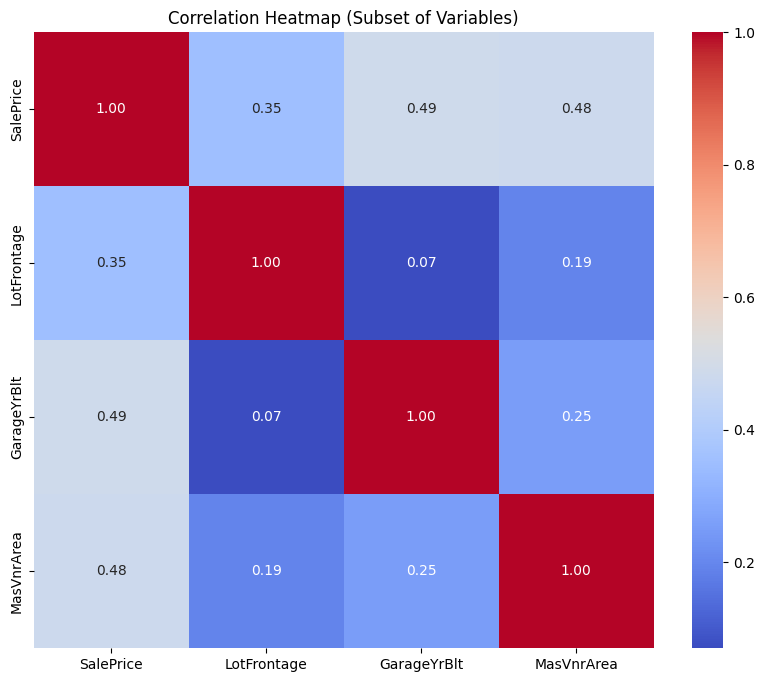

In [85]:
# Select a subset of columns for correlation heatmap
subset_columns_heatmap = ['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea']

# Correlation heatmap for the selected columns
correlation_matrix_subset = data_numeric[subset_columns_heatmap].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Subset of Variables)')
plt.show()

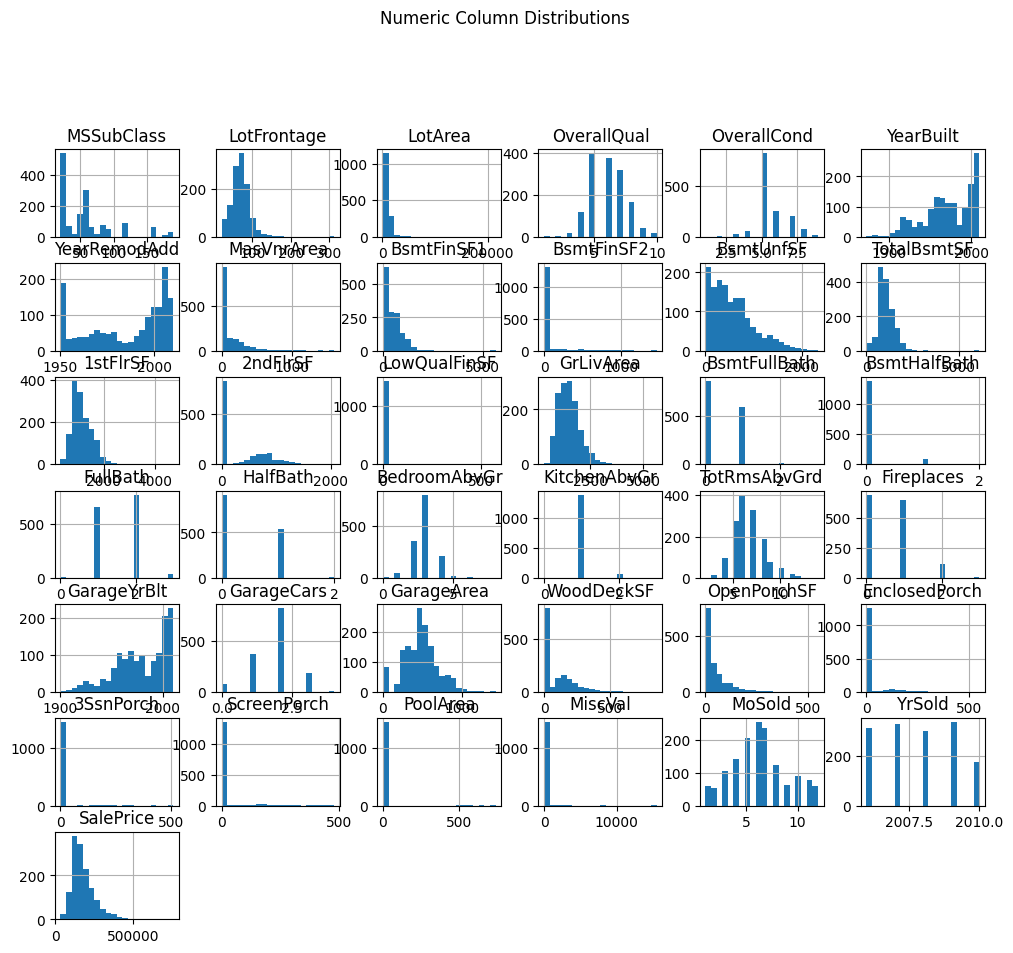

In [86]:
# Distribution of numeric columns
data_numeric.hist(figsize=(12, 10), bins=20)
plt.suptitle('Numeric Column Distributions', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

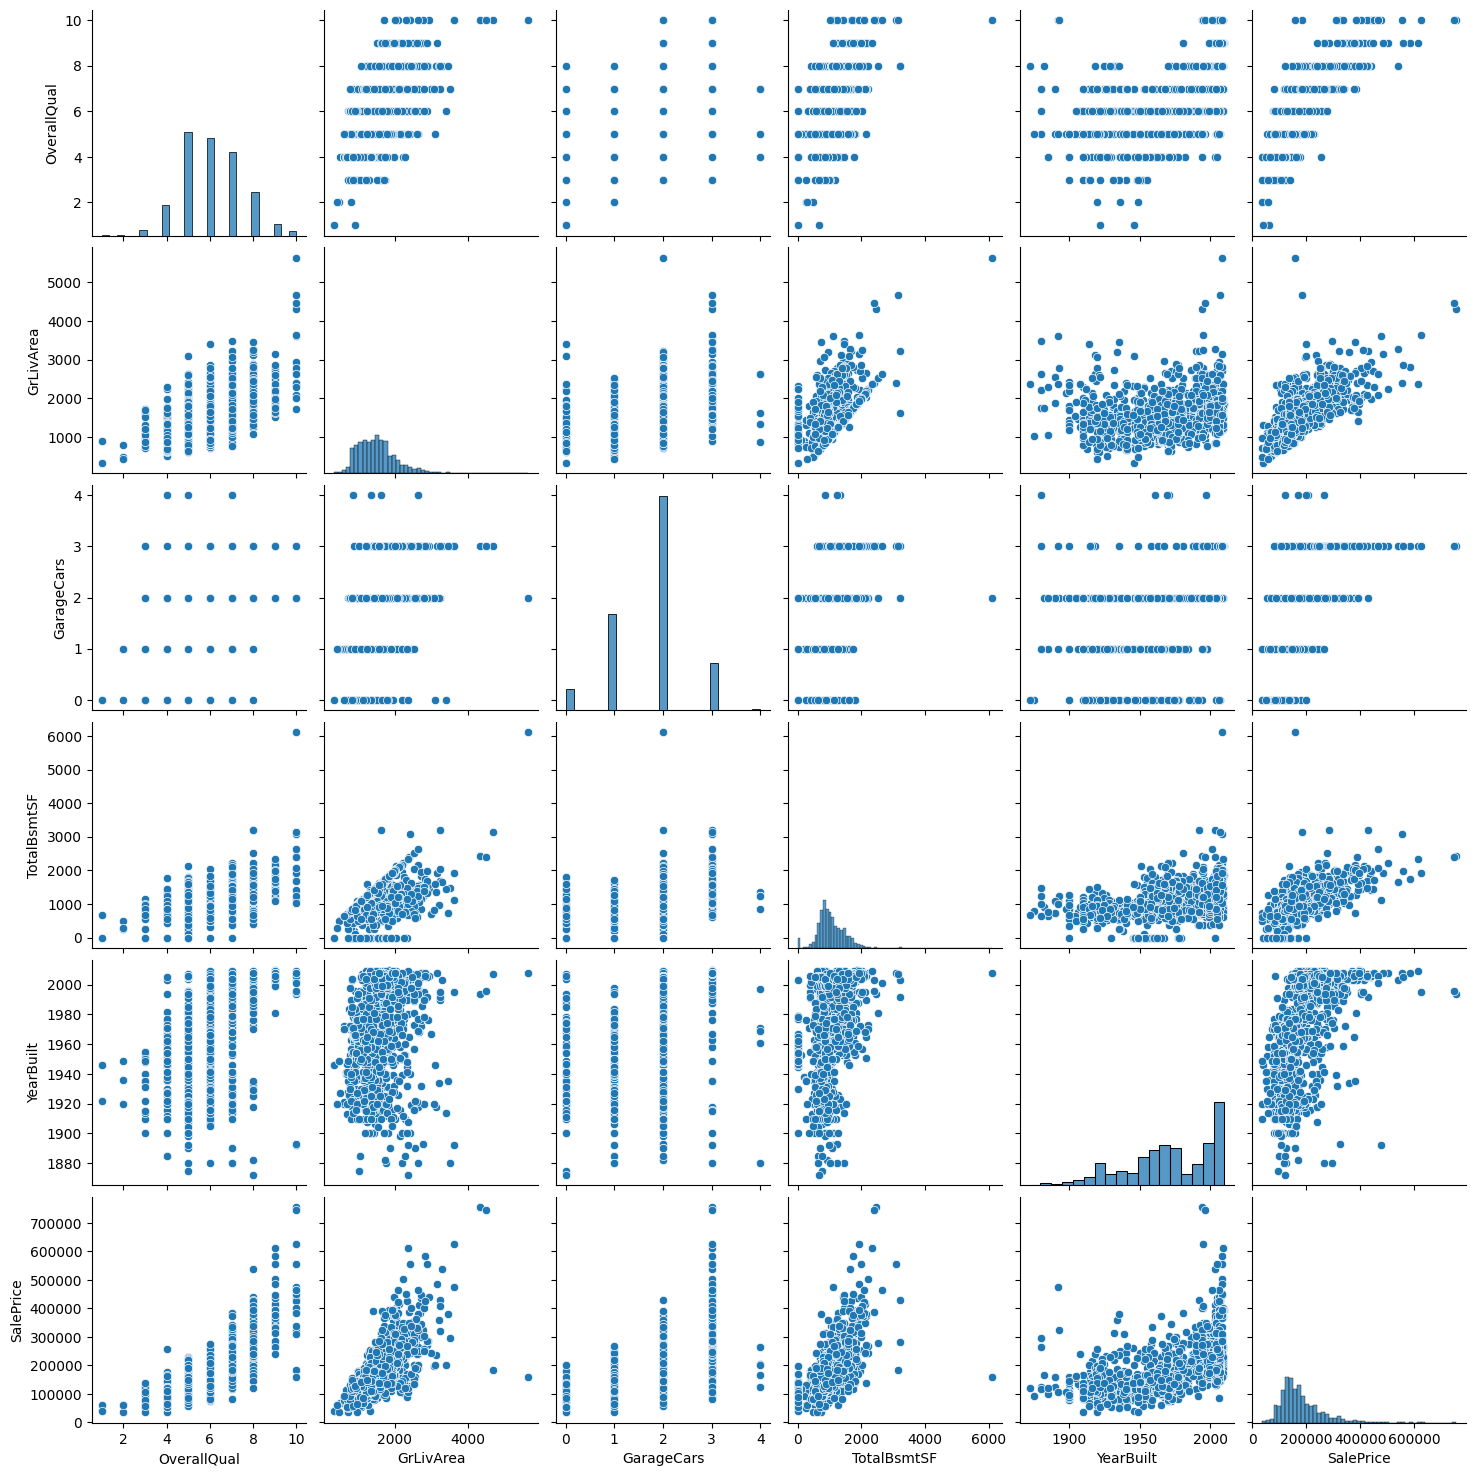

In [87]:
# Select columns for EDA
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']

# Create pairplot
sns.pairplot(data[selected_columns])
plt.show()

## Bivariate Analysis
- Investigating relationships between variables, such as 'SalePrice' vs. other features.

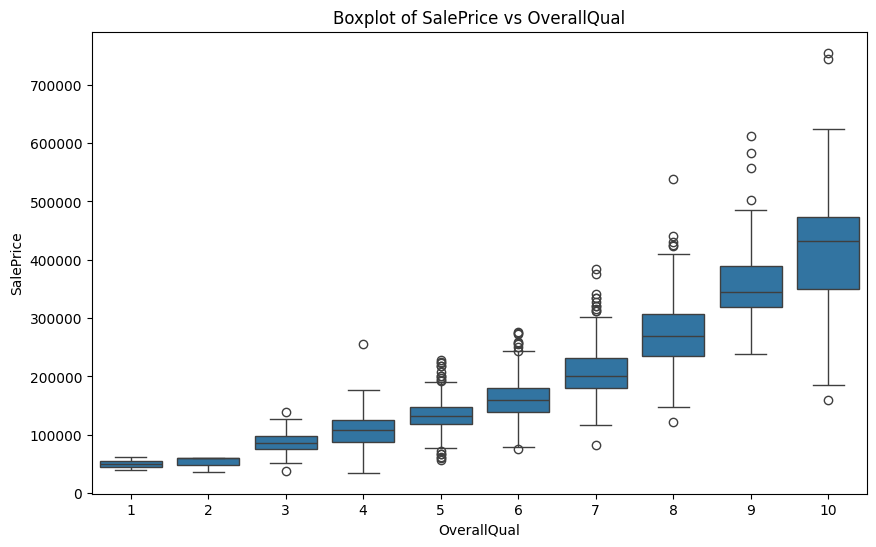

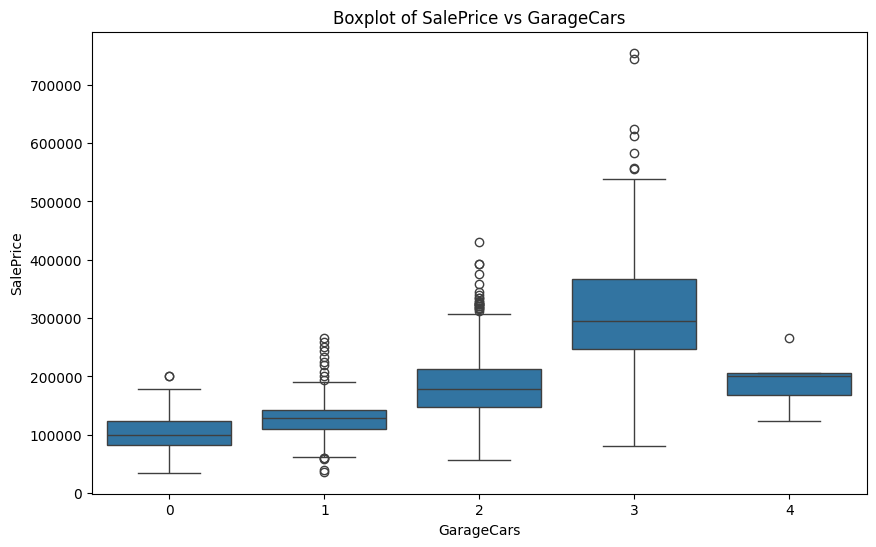

In [88]:
# Boxplot for categorical variables
categorical_columns = ['OverallQual', 'GarageCars']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='SalePrice', data=data)
    plt.title(f'Boxplot of SalePrice vs {column}')
    plt.show()

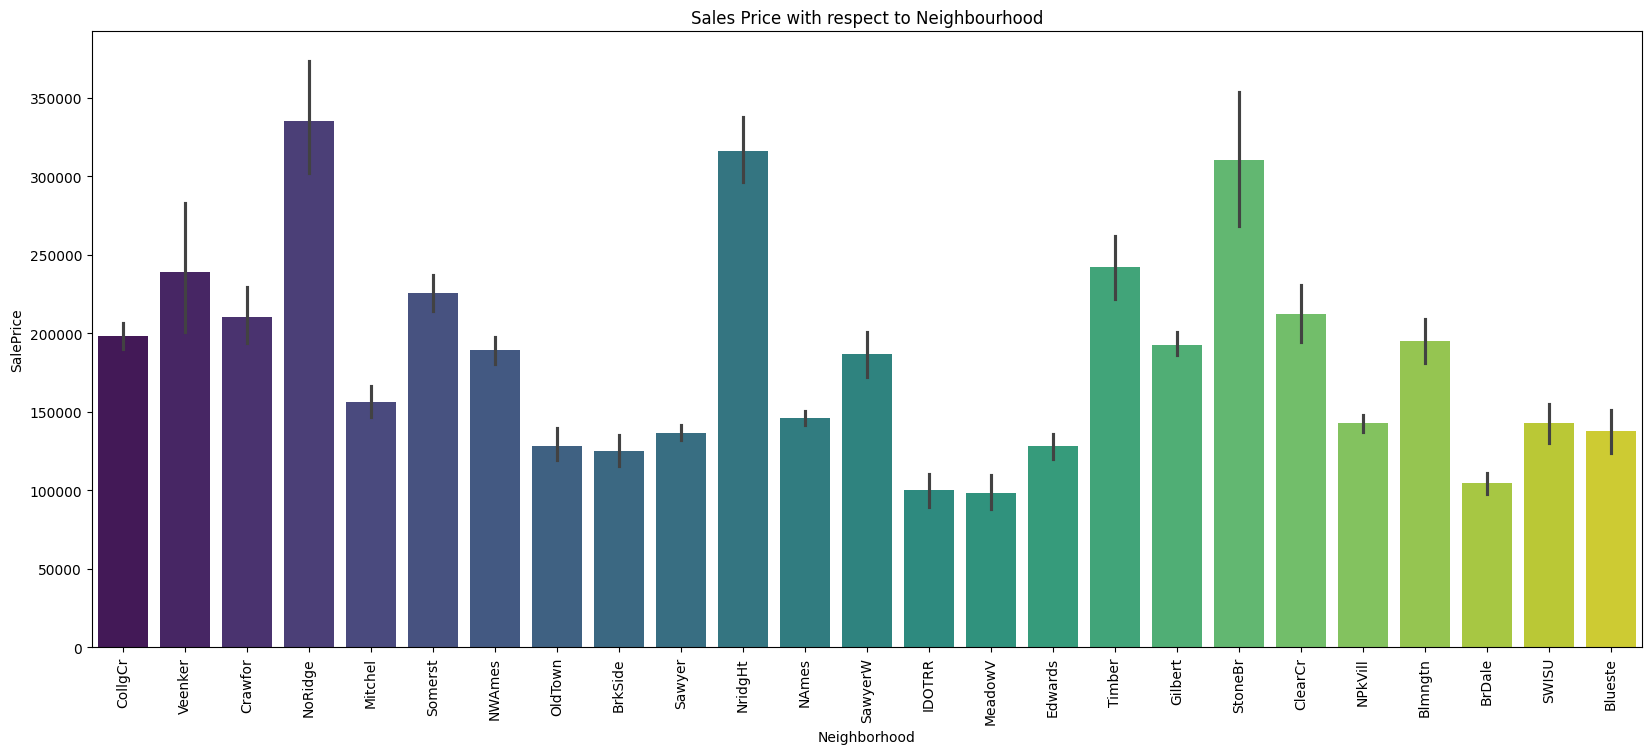

In [89]:
# Barplot comparing 'Sales Price' with respect to 'Neighborhood'
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=data, palette="viridis")
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

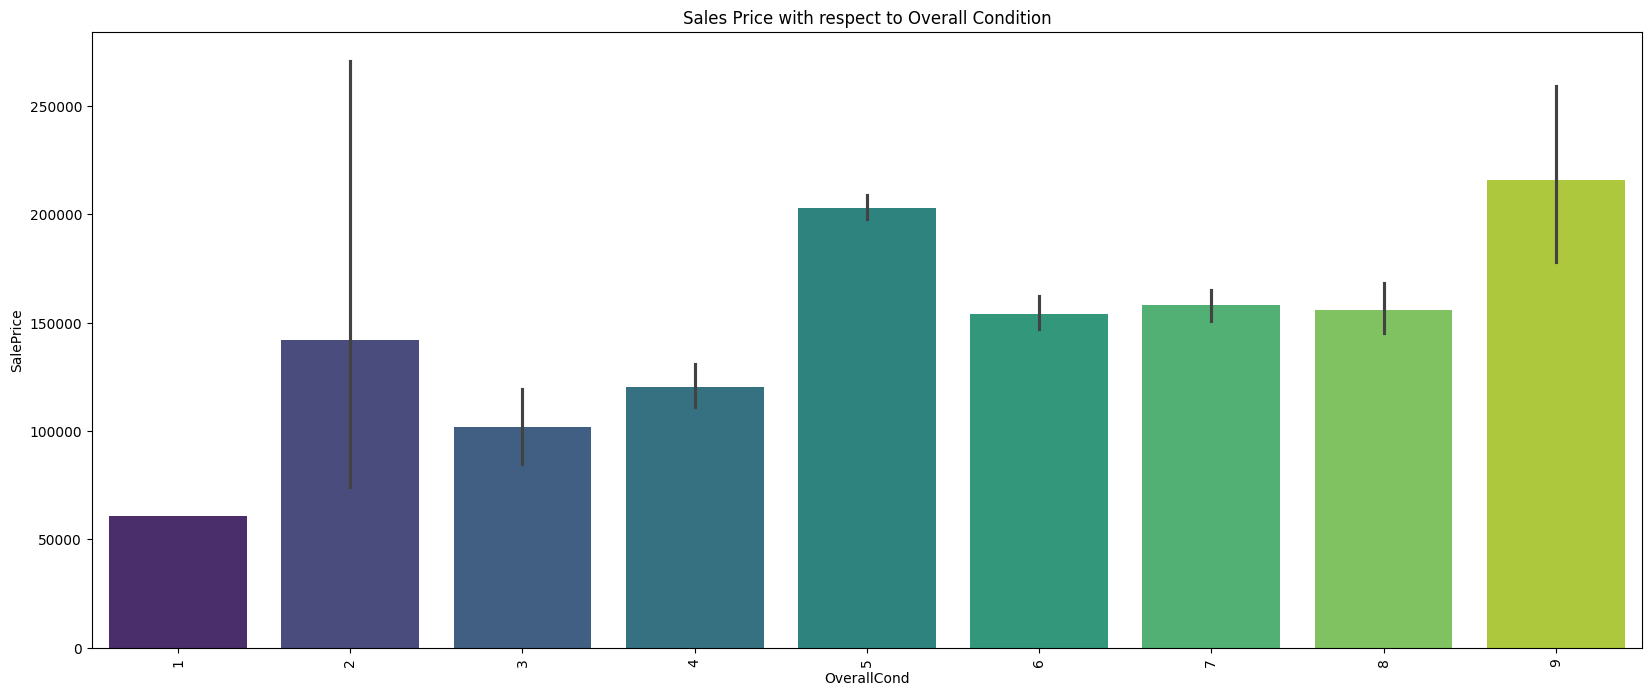

In [90]:
# Barplot comparing 'Sales Price' with respect to 'Overall Condition' using a different color palette
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data=data, palette="viridis")
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)
plt.show()

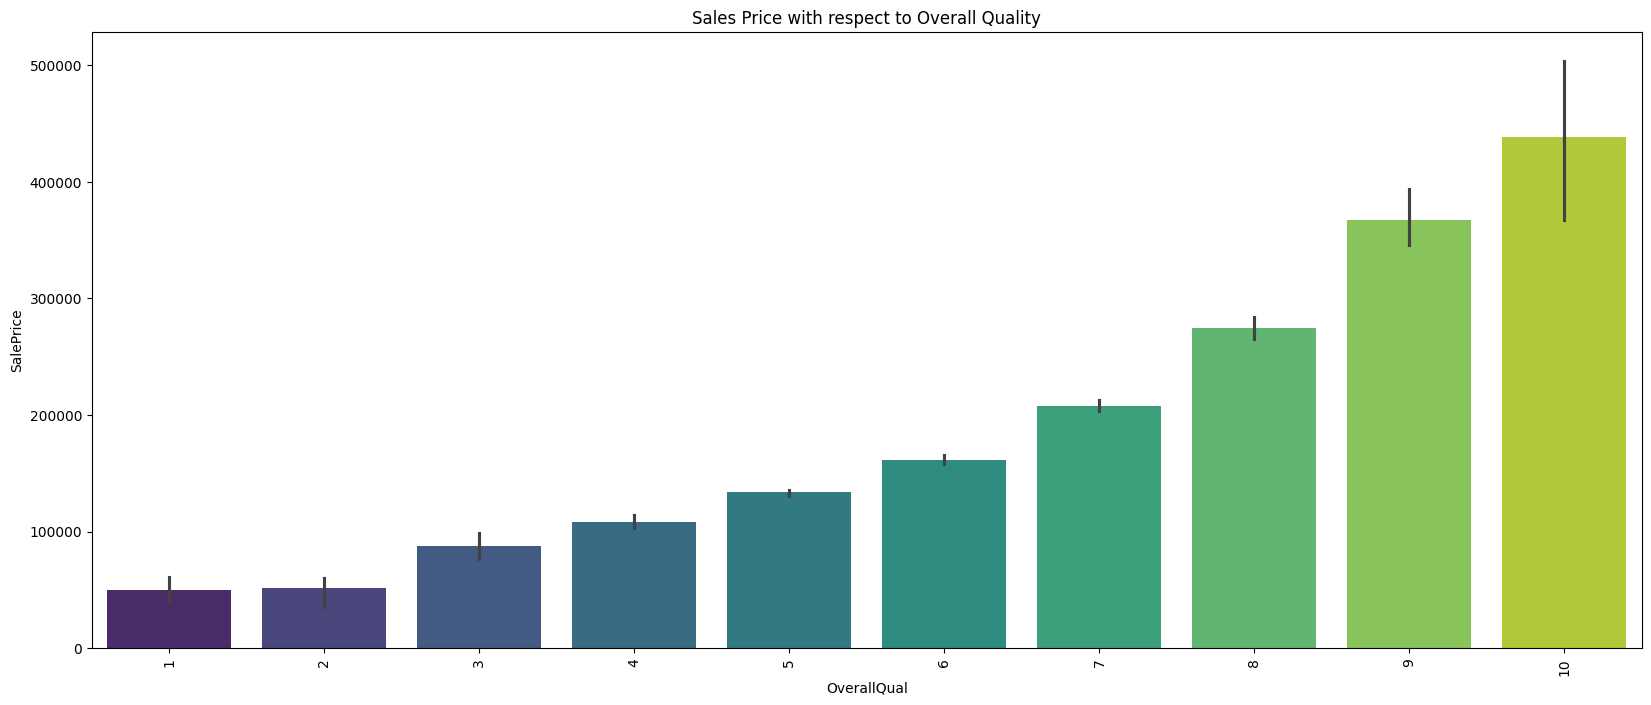

In [91]:
# Barplot comparing 'Sales Price' with respect to 'Overall Quality' using a different color palette
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data=data, palette="viridis")
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)
plt.show()

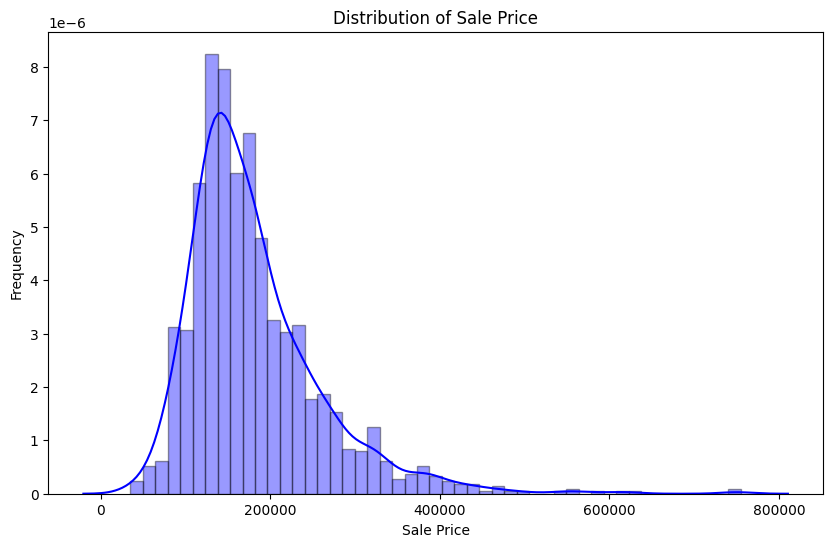

In [92]:
# Distribution plot for 'Sale Price'
plt.figure(figsize=(10, 6))
sns.distplot(data['SalePrice'], kde=True, color='blue', hist_kws={'edgecolor': 'black'})
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

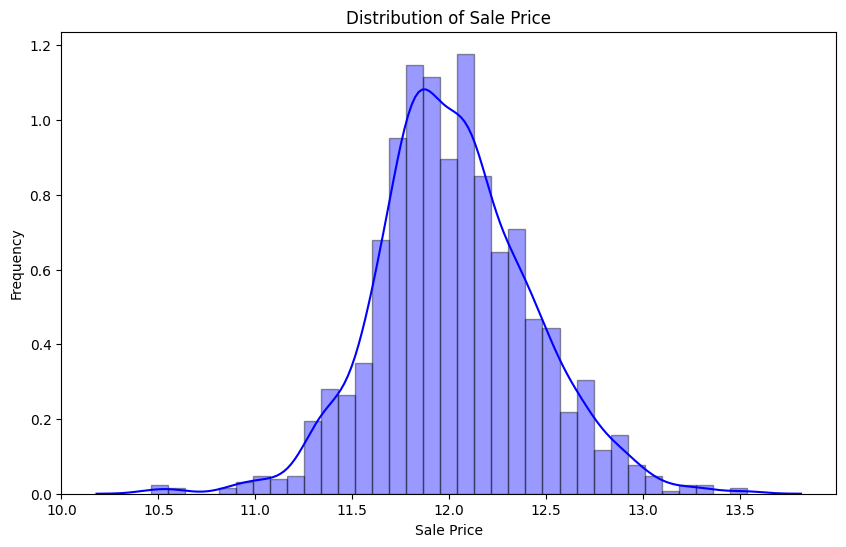

In [93]:
# Log transformation for 'Sale Price'
data['SalePrice'] = np.log1p(data['SalePrice'])

# Distribution plot for 'Sale Price'
plt.figure(figsize=(10, 6))
sns.distplot(data['SalePrice'], kde=True, color='blue', hist_kws={'edgecolor': 'black'})
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

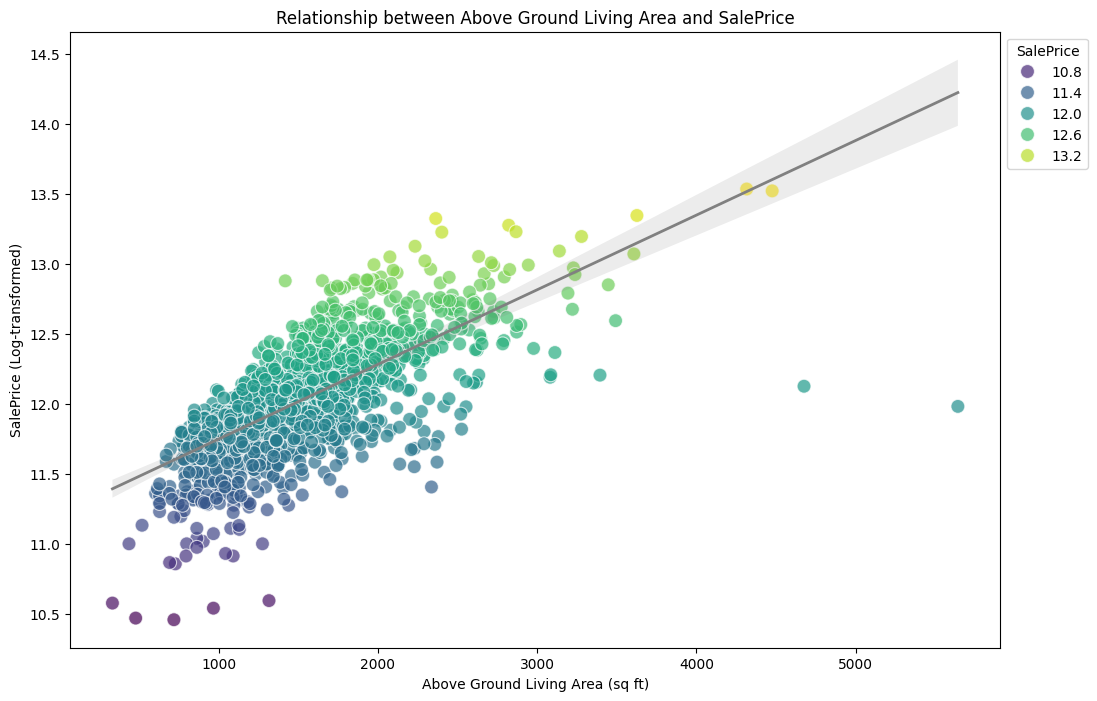

In [94]:
# Analyzing the relationship between 'GrLivArea' (Above Ground Living Area) and 'SalePrice'
plt.figure(figsize=(12, 8))

# Scatter plot with color gradient representing SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, hue='SalePrice', palette='viridis', edgecolor='w', s=100, alpha=0.7)

# Adding a regression line for better trend visualization
sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=False, color='grey', line_kws={'linewidth': 2})

# Setting labels and title
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('SalePrice (Log-transformed)')
plt.title('Relationship between Above Ground Living Area and SalePrice')

# Displaying the legend
plt.legend(title='SalePrice', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


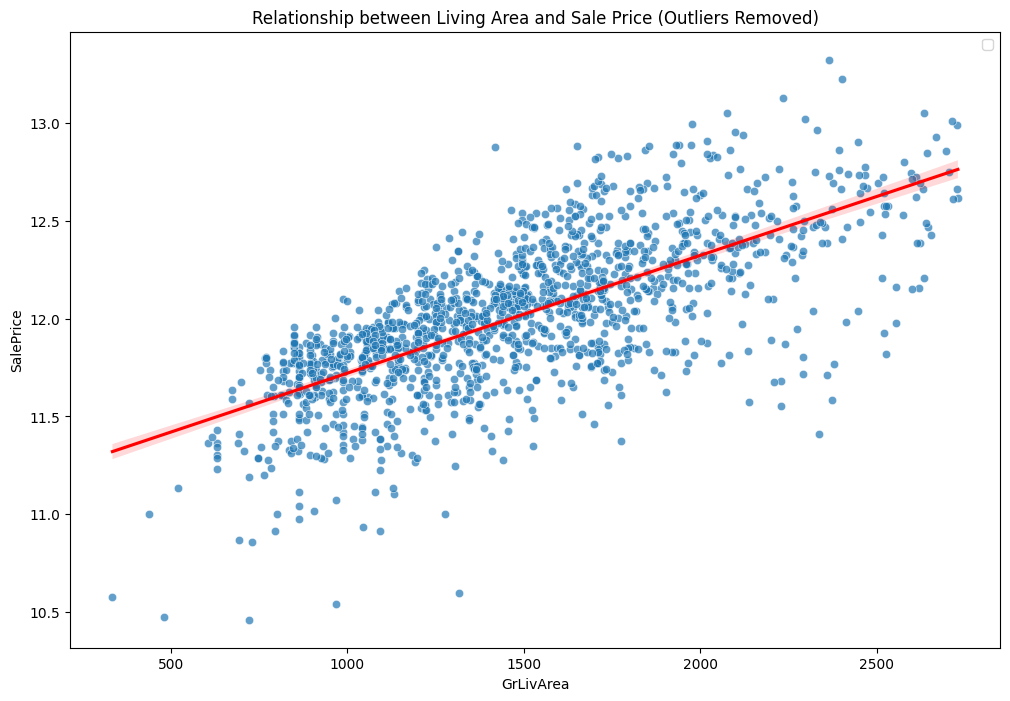

In [95]:
# Removing outliers on the lower right side of 'GrLivArea'
q1 = data['GrLivArea'].quantile(0.25)
q3 = data['GrLivArea'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['GrLivArea'] > lower_bound) & (data['GrLivArea'] < upper_bound)]

# Analyzing the relationship between living area and sale price after removing outliers
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, alpha=0.7, edgecolor='w')

# Regression line
sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=False, color='red')

# Highlighting outliers
outliers = data[(data['GrLivArea'] > 4000) & (data['SalePrice'] < 300000)]
sns.scatterplot(x='GrLivArea', y='SalePrice', data=outliers, color='orange', marker='X', s=100, label='Outliers')

# Adding labels and title
plt.title('Relationship between Living Area and Sale Price (Outliers Removed)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Show the plot
plt.legend()
plt.show()

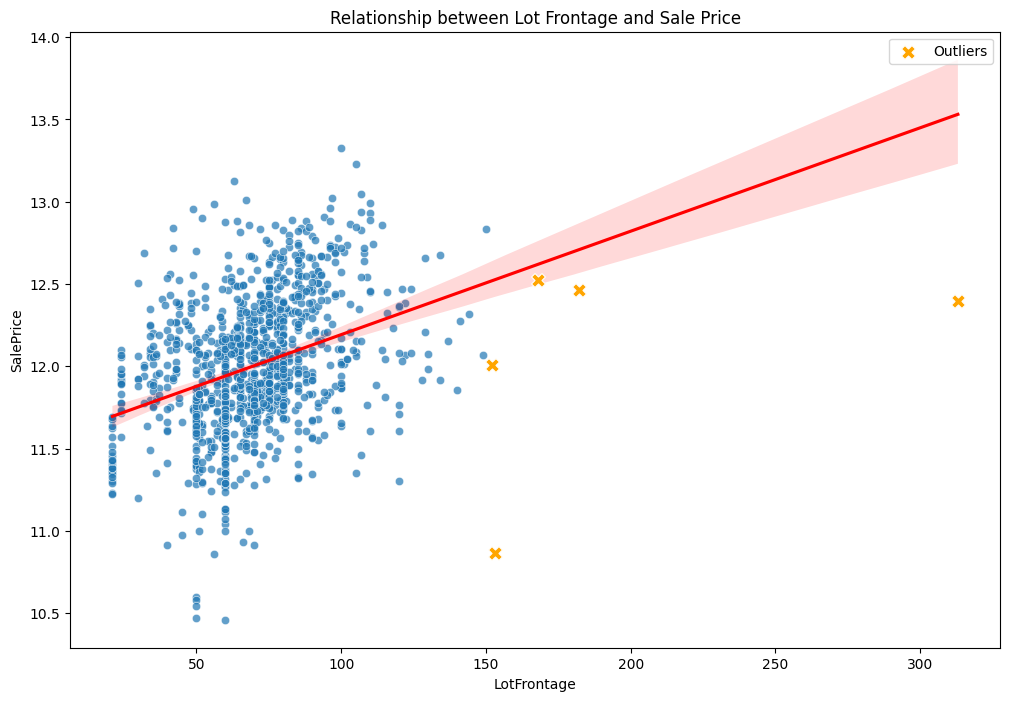

In [96]:
# Analyzing the relationship between lot frontage and sale price
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(x='LotFrontage', y='SalePrice', data=data, alpha=0.7, edgecolor='w')

# Regression line
sns.regplot(x='LotFrontage', y='SalePrice', data=data, scatter=False, color='red')

# Highlighting outliers
outliers_lot_frontage = data[(data['LotFrontage'] > 150) & (data['SalePrice'] < 300000)]
sns.scatterplot(x='LotFrontage', y='SalePrice', data=outliers_lot_frontage, color='orange', marker='X', s=100, label='Outliers')

# Adding labels and title
plt.title('Relationship between Lot Frontage and Sale Price')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

# Show the plot
plt.legend()
plt.show()

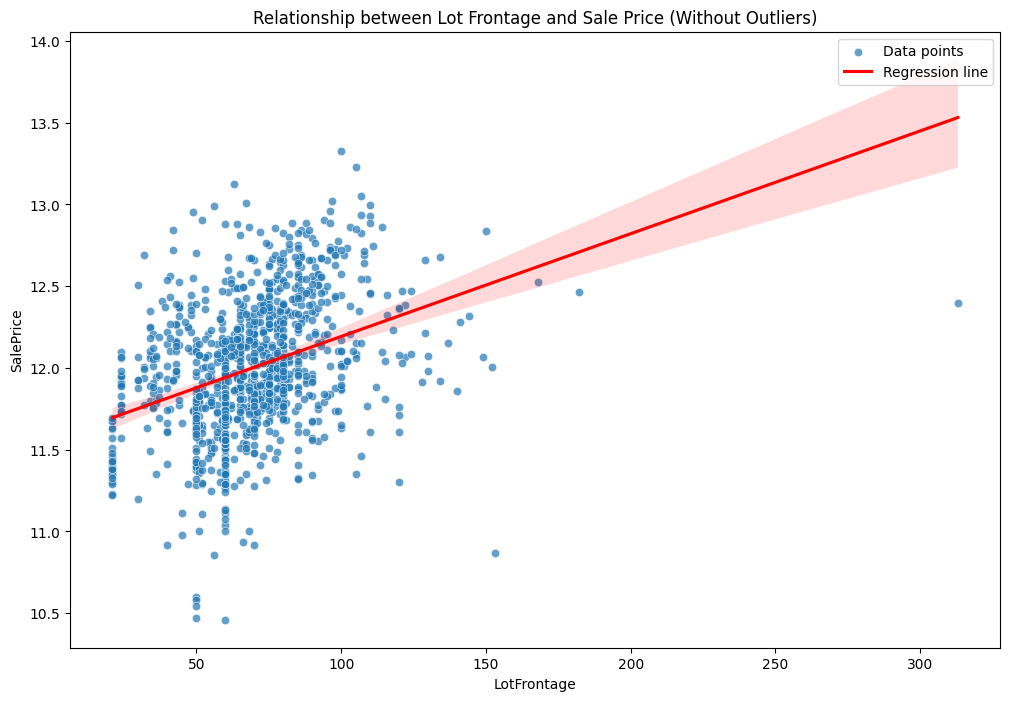

In [97]:
# Analyzing the relationship between lot frontage and sale price without outliers
plt.figure(figsize=(12, 8))

# Scatter plot without outliers
sns.scatterplot(x='LotFrontage', y='SalePrice', data=data, alpha=0.7, edgecolor='w', label='Data points')

# Regression line
sns.regplot(x='LotFrontage', y='SalePrice', data=data, scatter=False, color='red', label='Regression line')

# Adding labels and title
plt.title('Relationship between Lot Frontage and Sale Price (Without Outliers)')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

# Show the plot
plt.legend()
plt.show()

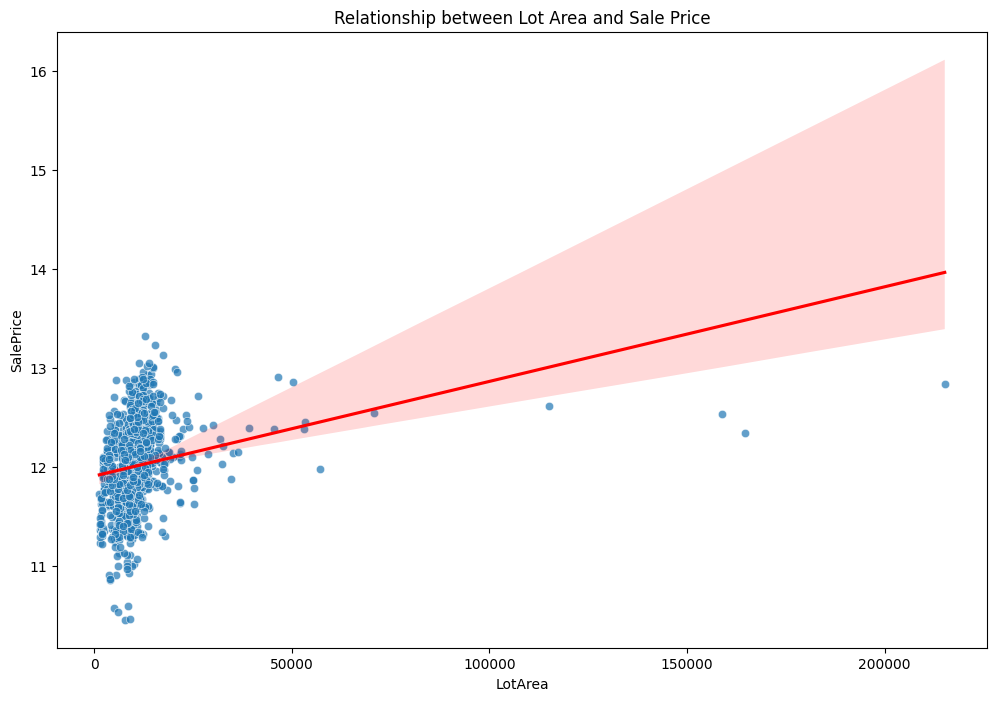

In [98]:
# LotArea vs SalePrice
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LotArea', y='SalePrice', data=data, alpha=0.7, edgecolor='w')
sns.regplot(x='LotArea', y='SalePrice', data=data, scatter=False, color='red')
plt.title('Relationship between Lot Area and Sale Price')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

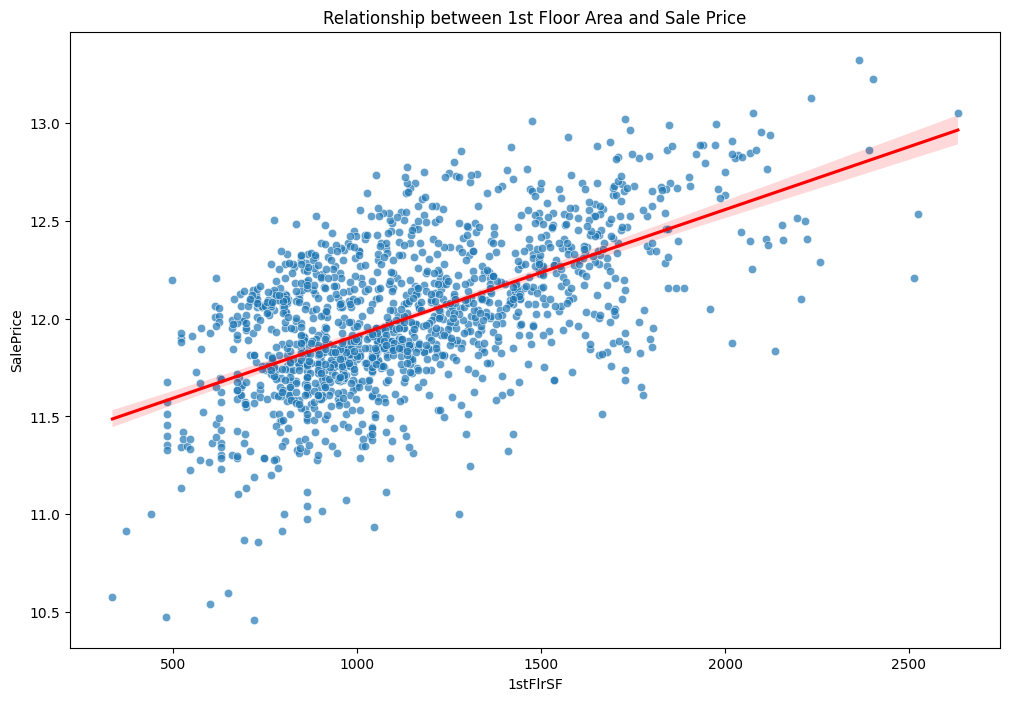

In [99]:
# 1stFlrSF vs SalePrice
plt.figure(figsize=(12, 8))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=data, alpha=0.7, edgecolor='w')
sns.regplot(x='1stFlrSF', y='SalePrice', data=data, scatter=False, color='red')
plt.title('Relationship between 1st Floor Area and Sale Price')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

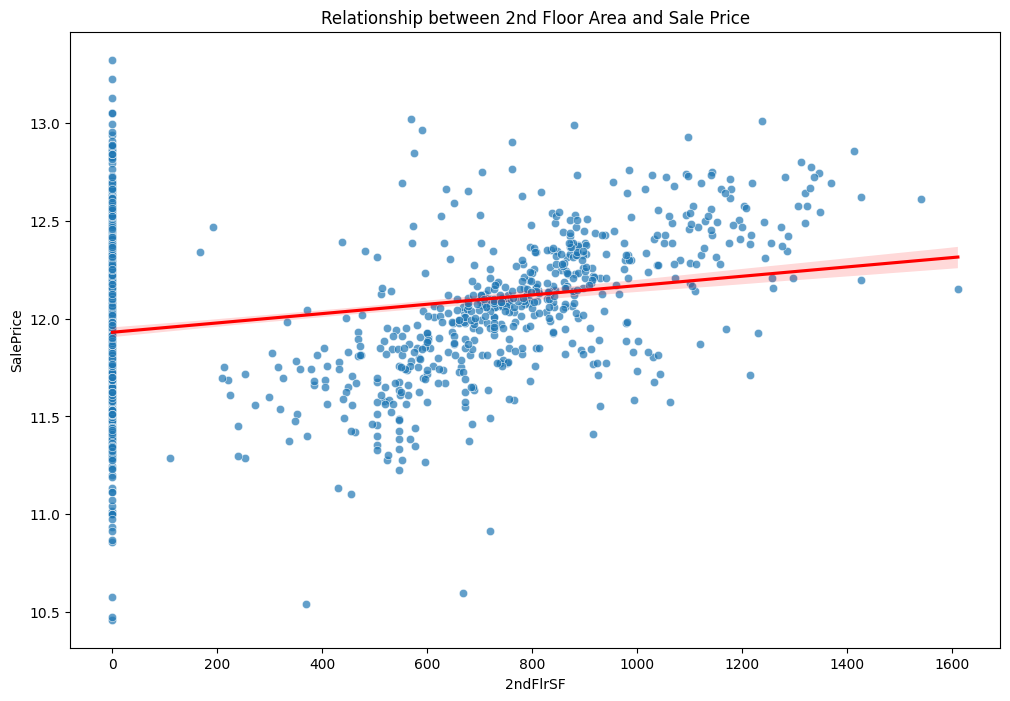

In [100]:
# 2ndFlrSF vs SalePrice
plt.figure(figsize=(12, 8))
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=data, alpha=0.7, edgecolor='w')
sns.regplot(x='2ndFlrSF', y='SalePrice', data=data, scatter=False, color='red')
plt.title('Relationship between 2nd Floor Area and Sale Price')
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')
plt.show()

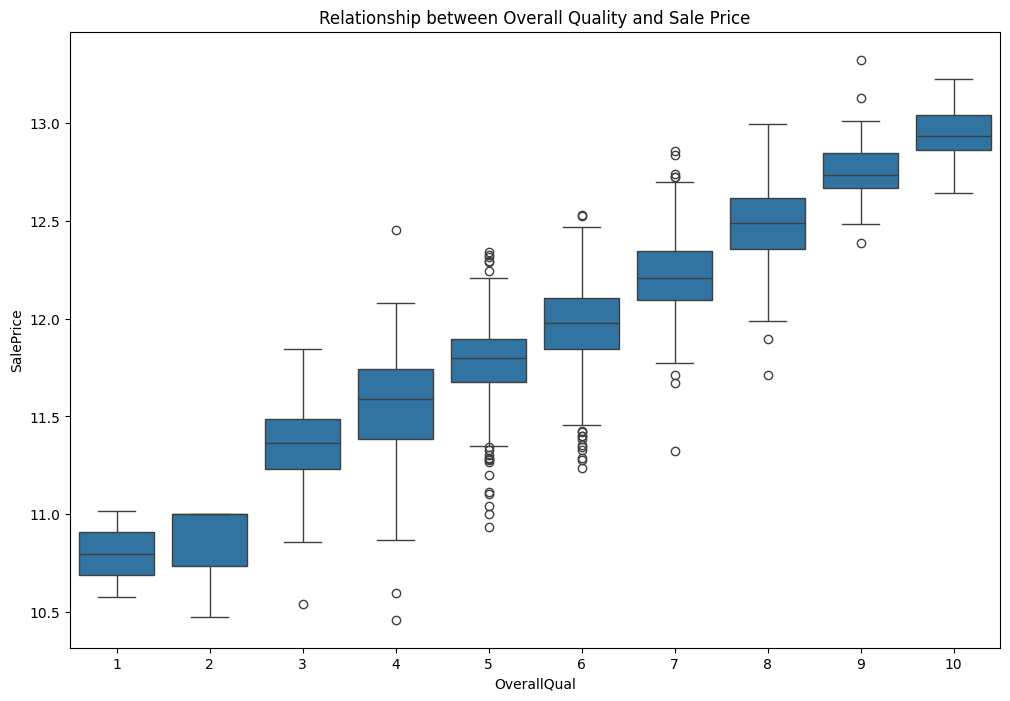

In [101]:
# OverallQual vs SalePrice
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Relationship between Overall Quality and Sale Price')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

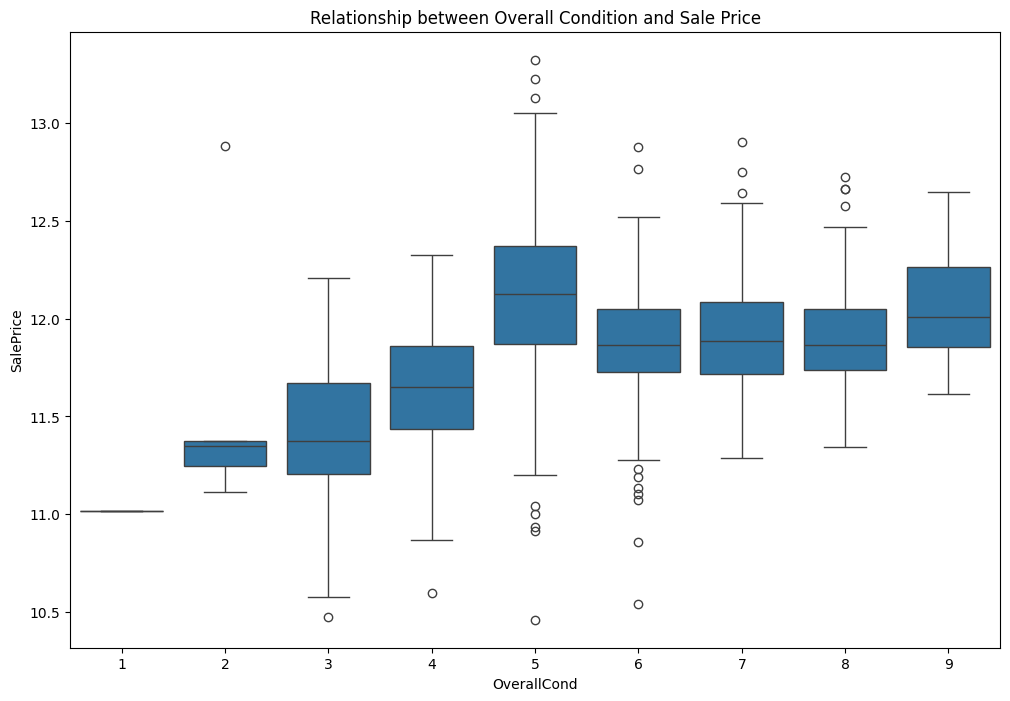

In [102]:
# OverallCond vs SalePrice
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallCond', y='SalePrice', data=data)
plt.title('Relationship between Overall Condition and Sale Price')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

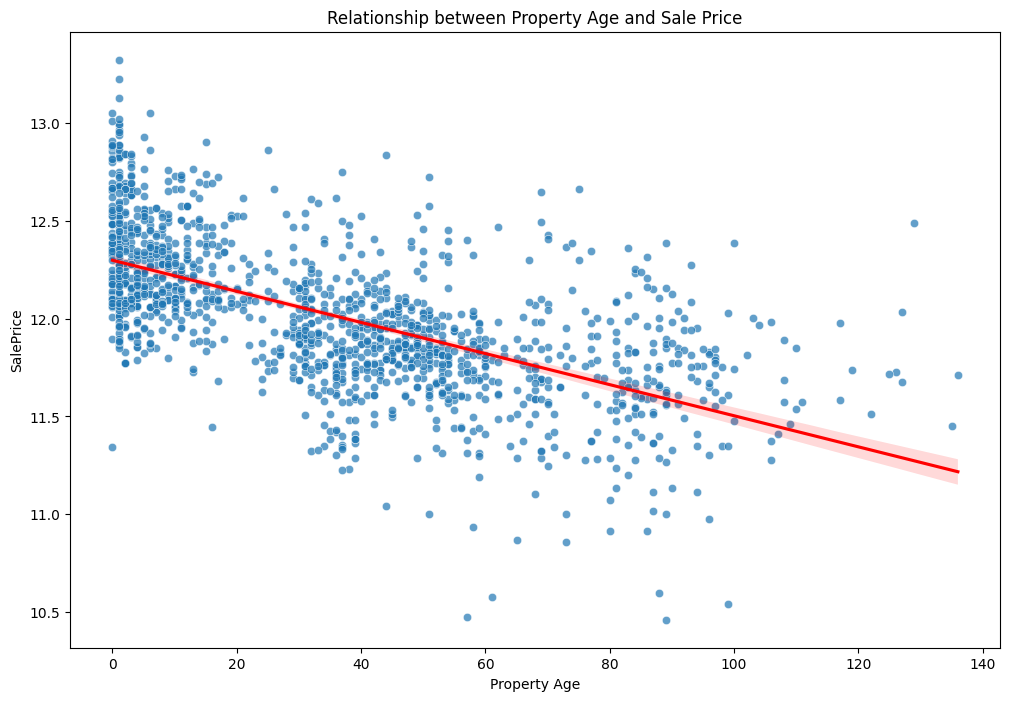

In [103]:
# Create a column for 'Age of the property' when it was sold: Named 'PropAge'
data['PropAge'] = data['YrSold'] - data['YearBuilt']

# Plot 'PropAge' vs 'SalePrice' with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PropAge', y='SalePrice', data=data, alpha=0.7, edgecolor='w')
sns.regplot(x='PropAge', y='SalePrice', data=data, scatter=False, color='red')
plt.title('Relationship between Property Age and Sale Price')
plt.xlabel('Property Age')
plt.ylabel('SalePrice')
plt.show()

In [104]:
# Drop columns 'MoSold', 'YrSold', 'YearBuilt', and 'YearRemodAdd'
columns_to_drop = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']
data = data.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.429220,8


In [105]:
# Display unique values in 'Street' and 'Utilities' columns
print("Unique values in 'Street' column:", data['Street'].unique())
print("Unique values in 'Utilities' column:", data['Utilities'].unique())

# Drop columns 'Street' and 'Utilities'
columns_to_drop = ['Street', 'Utilities']
data = data.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe
data.head()

Unique values in 'Street' column: ['Pave' 'Grvl']
Unique values in 'Utilities' column: ['AllPub' 'NoSeWa']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,12.429220,8


In [106]:
# Columns to display unique values
uniq_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Display unique values in selected columns
for column in uniq_columns:
    print(f"Unique values in '{column}' column:\n{data[column].value_counts()}\n")

# After imputing null values and finding low variance, we decided to drop the following columns
columns_to_drop_low_variance = ['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ]
data = data.drop(columns=columns_to_drop_low_variance)

# Display the first few rows of the modified dataframe
data.head()

Unique values in 'Id' column:
Id
1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: count, Length: 1429, dtype: int64

Unique values in 'MSSubClass' column:
MSSubClass
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: count, dtype: int64

Unique values in 'LotFrontage' column:
LotFrontage
60.0     141
70.0      70
80.0      68
50.0      57
75.0      52
        ... 
150.0      1
118.0      1
140.0      1
141.0      1
46.0       1
Name: count, Length: 107, dtype: int64

Unique values in 'LotArea' column:
LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: count, Length: 1047, dtype: int64

Unique values in 'OverallQual' column:
OverallQual
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,NaN,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,NaN,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,NaN,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,NaN,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,NaN,WD,Normal,12.429220,8


In [107]:
# Drop 'Id' from the DataFrame
data = data.drop(['Id'], axis=1)

# Display the first few rows of the DataFrame
data.head()

# Determine the types of each feature in the data: int, float, object
types = data.dtypes

# Numerical values are either of type int or float
numeric_type = types[(types == 'int64') | (types == float)]

# Categorical values are of type object
categorical_type = types[types == object]

# Display the count of each type
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

# Convert numeric_type to a list for easier handling
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [108]:
# Categorical columns in the dataset
categorical_columns = list(categorical_type.index)
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


# Model Building and Evaluation

In [109]:
# One-hot encoding categorical columns with drop_first
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,12.247699,5,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,12.109016,31,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,12.317171,7,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,11.849405,91,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12.429220,8,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [110]:
# Separating features (X) and target variable (y)
X = data_encoded.drop(['SalePrice'], axis=1)
y = data_encoded['SalePrice']

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

# Standardizing numeric features
numeric_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [112]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.706256,0.154684,2.241710,-0.513939,1.141388,1.323938,-0.300737,177,0.345478,0.113320,1.995226,-0.111211,1.923409,1.131973,-0.250936,2.754667,-0.727119,1.478865,-0.222797,11,2.231812,2005.0,3,1.267298,0.485675,-0.351334,-0.378185,-0.115383,-0.268919,-0.054574,-1.209026,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1070,-0.869945,0.135261,-0.020017,-0.764271,-0.513939,0.150521,0.360916,-0.300737,462,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,1.131973,-0.250936,-0.990631,-0.727119,0.212713,-0.222797,6,-0.918240,1956.0,1,-0.857140,-0.758474,-0.368801,-0.378185,-0.115383,3.351363,-0.054574,0.445587,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
513,-0.869945,0.091338,-0.115156,-0.012775,-0.513939,-0.565768,-0.223442,-0.300737,748,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,5,-0.918240,1983.0,2,0.077613,0.257158,-0.718144,2.265177,-0.115383,-0.268919,-0.054574,-0.447904,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
467,0.324542,0.442720,-0.086269,-0.764271,1.258264,0.771305,-0.106571,-0.300737,342,-0.764234,-0.722635,1.060654,-0.111211,0.401627,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,7,2.231812,1942.0,1,-0.734395,0.663411,-0.718144,-0.378185,-0.115383,-0.268919,-0.054574,0.908879,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,Fa

In [113]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.324542,-0.391812,-0.311054,0.738720,3.030467,-0.565768,-0.190718,1.017100,0,-1.181307,-1.612614,0.586105,-0.111211,-0.737471,1.131973,-0.250936,-0.990631,-0.727119,0.212713,-0.222797,6,-0.918240,1971.0,2,0.511942,1.408208,-0.718144,-0.378185,-0.115383,-0.268919,-0.054574,1.173617,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
335,3.191312,NaN,15.212883,-0.764271,0.372163,-0.565768,1.910634,0.621749,103,1.149833,1.355879,-0.365415,-0.111211,0.719411,3.080292,-0.250936,0.882018,-0.727119,0.212713,-0.222797,7,2.231812,1965.0,2,0.290057,4.912141,-0.718144,-0.378185,-0.115383,-0.268919,-0.054574,0.180849,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
200,-0.869945,0.486643,-0.178352,-1.515766,-0.513939,-0.565768,-1.008820,-0.300737,1121,0.211419,-0.060126,-0.769750,-0.111211,-0.768802,-0.816345,-0.250936,0.882018,-0.727119,-1.053438,-0.222797,5,-0.918240,2003.0,2,-0.130110,0.358721,0.399753,-0.378185,-0.115383,-0.268919,-0.054574,-1.010472,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
214,0.085645,NaN,0.053728,-0.012775,1.258264,0.347501,-0.125270,-0.300737,311,-0.861055,-1.288469,0.932332,-0.111211,-0.162327,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,6,-0.918240,1977.0,1,-0.795767,-0.758474,-0.089327,-0.378185,-0.115383,-0.268919,-0.054574,-0.150073,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,Fals

## Lasso Regression
- Implementing Lasso Regression for feature selection and prediction.

In [126]:
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Create LassoCV model
lasso_model = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)

# Fit the model on imputed training data
lasso_model.fit(X_train_imputed, y_train)

# Display the optimal alpha selected by cross-validation
print(f"Optimal alpha: {lasso_model.alpha_}")

# Display the coefficients of the selected features
lasso_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_model.coef_})
lasso_coefficients = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]
print(lasso_coefficients)

Optimal alpha: 0.000774263682681127
                   Feature  Coefficient
0               MSSubClass    -0.009371
1              LotFrontage     0.012615
2                  LotArea     0.019596
3              OverallQual     0.078983
4              OverallCond     0.057287
5               MasVnrArea     0.001366
6               BsmtFinSF1     0.019669
8                BsmtUnfSF    -0.000041
9              TotalBsmtSF     0.053467
12            LowQualFinSF    -0.003021
13               GrLivArea     0.121035
14            BsmtFullBath     0.012424
16                FullBath     0.004783
17                HalfBath     0.007045
18            BedroomAbvGr    -0.005527
19            KitchenAbvGr    -0.010071
20            TotRmsAbvGrd     0.007726
21              Fireplaces     0.009856
22             GarageYrBlt     0.000046
23              GarageCars     0.027669
24              GarageArea     0.015134
25              WoodDeckSF     0.013390
27           EnclosedPorch     0.010395
28  

### The Lasso regression model indicates that features like OverallQual, LotArea, TotalBsmtSF, and GarageArea positively influence SalePrice, while certain conditions and characteristics have negative effects. The regularization effect helps in feature selection, improving model interpretability.

In [115]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the imputed test data
lasso_predictions = lasso_model.predict(X_test_imputed)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

# Display RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.10958677697485285


#### The Root Mean Squared Error (RMSE) value of approximately 0.1096 indicates that the Lasso regression model has a relatively low level of error in predicting the housing prices on the test set. In other words, the model's predictions are, on average, within a small range of the actual sale prices. This suggests that the Lasso regression model is performing well and provides accurate predictions for the given dataset.

## Ridge Regression
- Applying Ridge Regression and comparing its performance with Lasso.

In [123]:
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Create RidgeCV model
ridge_model = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)

# Fit the model on imputed training data
ridge_model.fit(X_train_imputed, y_train)

# Display the optimal alpha selected by cross-validation
print(f"Optimal alpha: {ridge_model.alpha_}")

# Display non-zero coefficients
non_zero_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_model.coef_})
non_zero_coefficients = non_zero_coefficients[non_zero_coefficients['Coefficient'] != 0]
print(non_zero_coefficients)

Optimal alpha: 17.886495290574352
                   Feature  Coefficient
0               MSSubClass    -0.012957
1              LotFrontage     0.012376
2                  LotArea     0.021151
3              OverallQual     0.073161
4              OverallCond     0.055177
..                     ...          ...
197  SaleCondition_AdjLand     0.011289
198   SaleCondition_Alloca    -0.015986
199   SaleCondition_Family    -0.002608
200   SaleCondition_Normal     0.057242
201  SaleCondition_Partial     0.051654

[199 rows x 2 columns]


### The Ridge Regression model with an optimal alpha of 17.89 indicates that various features influence the SalePrice, with OverallQual having the strongest positive impact, while features like MSSubClass and SaleCondition_Alloca contribute negatively. The model helps identify key predictors while mitigating multicollinearity.

In [124]:
# Predict on the imputed test set
ridge_predictions = ridge_model.predict(X_test_imputed)

# Calculate RMSE
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"Root Mean Squared Error (RMSE) for Ridge Regression: {ridge_rmse}")

Root Mean Squared Error (RMSE) for Ridge Regression: 0.10859828986944665


#### The Root Mean Squared Error (RMSE) for Ridge Regression is 0.1086, indicating that the model has relatively low prediction errors. The selected features have coefficients that contribute to the predictive power of the model, with some positively and others negatively influencing the target variable.

## Both Ridge and Lasso regression models were trained and evaluated on the dataset. The RMSE for Lasso Regression was 0.1096, while for Ridge Regression, it was slightly lower at 0.1086. The lower RMSE in Ridge Regression suggests that it performed slightly better in terms of prediction accuracy compared to Lasso Regression on this particular dataset. It's essential to consider the specific characteristics of the dataset and the goals of the analysis when choosing between these regularization techniques.

In [127]:
from sklearn.metrics import r2_score

# Predictions using Lasso Regression
lasso_pred = lasso_model.predict(X_test_imputed)

# R-squared for Lasso Regression
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"R-squared for Lasso Regression: {lasso_r2}")

# Predictions using Ridge Regression
ridge_pred = ridge_model.predict(X_test_imputed)

# R-squared for Ridge Regression
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"R-squared for Ridge Regression: {ridge_r2}")

R-squared for Lasso Regression: 0.9160316599759731
R-squared for Ridge Regression: 0.9175396389657744


##### The R-squared values for Lasso Regression (0.916) and Ridge Regression (0.918) indicate that both models explain a high percentage of the variance in the target variable. There is a slight difference in performance, with Ridge Regression slightly outperforming Lasso Regression. However, the choice between the two models may depend on other factors such as feature importance and interpretability.

In [129]:
# Fit Ridge Regression model
ridge_model = Ridge(alpha=17.886495290574352) 
ridge_model.fit(X_train_imputed, y_train)

# Extract coefficients and corresponding feature names
ridge_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_model.coef_})

# Sort coefficients by magnitude
ridge_coefficients = ridge_coefficients.reindex(ridge_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

# Select the top 10 coefficients
top_10_variables = ridge_coefficients.head(10)

# Print the equation
equation_terms = [f"{row['Coefficient']:.4f} * {row['Feature']}" for _, row in top_10_variables.iterrows()]
equation = " + ".join(equation_terms)

print(f"Equation for log(Y) based on Ridge Regression (top 10 variables):")
print(f"log(Y) = {ridge_model.intercept_:.4f} + {equation}")

Equation for log(Y) based on Ridge Regression (top 10 variables):
log(Y) = 11.7362 + 0.0770 * Neighborhood_Crawfor + 0.0732 * OverallQual + -0.0693 * PropAge + 0.0685 * GrLivArea + 0.0572 * SaleCondition_Normal + 0.0552 * OverallCond + -0.0518 * Neighborhood_IDOTRR + 0.0517 * SaleCondition_Partial + 0.0480 * Condition1_Norm + 0.0447 * MSZoning_RL


## Inferences and Conclusion

### 1. Key Predictors of Housing Prices:
   - Variables such as `OverallQual`, `GrLivArea`, `TotalBsmtSF`, and `YearBuilt` have a significant positive impact on housing prices.
   - The quality of the overall material and finish of the house (`OverallQual`) and the above-ground living area (`GrLivArea`) are strong positive predictors.

### 2. Neighborhood Significance:
   - The neighborhood (`Neighborhood`) is a crucial factor affecting housing prices, as shown in the initial analysis.
   - Certain neighborhoods may have higher median prices, contributing to variations in overall housing prices.

### 3. Effect of Property Age:
   - The age of the property (`PropAge`) has a negative impact on housing prices. Newer properties tend to command higher prices in the market.

### 4. Feature Importance from Regularization:
   - Lasso and Ridge Regression helped identify important features for predicting housing prices.
   - The regularization models provided insights into feature importance, aiding in feature selection and model interpretation.

### 5. Model Performance and Conclusions:
   - Both Lasso and Ridge Regression models were evaluated based on RMSE and R-squared values.
   - The models demonstrated good predictive performance, with R-squared values around 0.92, indicating that they capture a significant portion of the variance in housing prices.

## Conclusion:
   - The analysis provides valuable insights into the factors influencing housing prices.
   - Businesses in the real estate sector can leverage these insights to make informed decisions, focusing on key features like overall quality, living area, neighborhood, and property age to maximize property values.
   - Implementing predictive models can assist in pricing strategies and better understanding market dynamics for effective decision-making.